<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Orbits in the Schwarzschild Geometry (General Relativity)

### Examples - Astrophysics
<section class="post-meta">
By Eilif Sommer Øyre, Jonas Tjemsland and Jon Andreas Støvneng
</section>
Last edited: January 25th 2018 
___

In this notebook we will discuss orbits in general relativity. More specifically, we will look at orbits in the *Schwarzschild geometry*, named after Karl Schwarzschild (1873-1916) who solved the Einstein equation in 1916 [[1]](#rsc). This geometry describes the curvature of space-time around a spherically symmetric mass distribution. This is to an excellent approximation the curved space-time outside the Sun. The relativistic corrections to the Newtonian gravity is however minute. We will therefore consider a spacecraft, planet or star orbiting a massive black hole.

It can be shown (see [appendix](#apnd) at the end of this notebook) that the force on a particle of mass $m\ll M$ outside a spherically symmetric mass distribution of mass $M$ is given by

\begin{equation}
\mathbf F =-\frac{GMm}{r^3}\mathbf r\left(1 + \frac{3l^2}{c^2r^2}\right),
\label{eq:force}
\end{equation}

where $G$ is the Newtonian gravitational constant, $r$ is the distance to the center of the mass distribution, $l$ is the angular momentum per unit mass and $c$ is the speed of light.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import time
%matplotlib inline

# Set common figure parameters
fig_size = 10
newparams = {'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

### Units
We will be using natural units, i.e. we let $G=c=1(=\hbar=k_B)$. In these units any velocity is given in terms of the speed of light. That is, if a spacecraft has the velocity $v=0.1$ in natural units, it has the velocity $v=0.1c\approx 3\times 10^7\,\mathrm{m/s}$ in SI-units.

We will measure distances in terms of the Schwarzschild radius, often called the *event horizon*, or *the point of no return*, in the case of Black Holes; see [appendix](#apnd). It is given by
\begin{equation}
R_\mathrm{S} = \frac{2MG}{c^2} = 2M.
\end{equation}
Nothing can escape once inside the Schwarzschild radius, even light. We will not be discussing this any further, but we will leave a couple of exercises on the subject later. We introduce the dimensionless variables

\begin{equation}
\rho\equiv \frac{r}{R_S} = \frac{r}{2M_\odot\mu} \quad \mathrm{and}\quad T\equiv \frac{\tau}{t_0},
\end{equation}

where $t_0$ is some characteristic time of the system and $\tau$ is the proper time. Note that $t_0$ have mass dimension $1$. We can thus choose $t_0=R_\mathrm{S}$.

**Exercise: ** What is $R_\mathrm{S}$ for the Sun in SI-units? What is $t_0$ in SI-units?  
*Answer: * $\sim 3\,\mathrm{km}$, $\sim 10\,\mathrm{\mu s}$

### Effective Potential. Differences between Classical and GR Orbits
In the appendix we show that the system can be described by a the equation

\begin{equation}
\mathcal E = \frac{1}{2}\left(\frac{\mathrm d r}{\mathrm d\tau}\right)^2 + V_\mathrm{eff}(r),
\label{eq:energy_ein}
\end{equation}
where $\mathcal E$ is a constant and
\begin{equation}
V_\mathrm{eff}(r)\equiv -\frac{M}{r}+\frac{l^2}{2r^2}- \frac{Ml^2}{r^3}
\label{eq:effpot}
\end{equation}
is an effective potential. The constant $\mathcal E$ reduces in the classical limit to the energy density of the particle. Note that the effective potential has extremum points at
\begin{equation}
r_\mathrm{min/max} = \frac{l^2}{2m}\mp \frac{l}{2}\sqrt{\frac{l^2}{m^2}-12}.
\end{equation}


In classical mechanics, the effective potential is given by
\begin{equation}
V_\mathrm{classical}(r)= -\frac{M}{r}+\frac{l^2}{2r^2}.
\end{equation}
This potential has a minimum at $r = l^2/M$

The last term in equation \eqref{eq:effpot} is a general relativistic correction. This term gives arise to several different types of orbits that we do not encounter in classical mechanics. To see this, we first visualize the potentials. In the code below we have used the newly defined units.

In [3]:
def Veff(rho, l):
    """ Evaluates the effective potential in the Schwarzschild geometry. """
    return -1/(2*rho) + l**2/(2*rho**2) - l**2/(2*rho**3)

def Vclassical(rho, l):
    """ Evaluates the classical effective potential. """
    return -1/(2*rho) + l**2/(2*rho**2)

def K(Z):
    """ Evaluates the kinetic part of the energy density. 
    Z = (x, y, u, v). 
    """
    rho2 = Z[0, :]**2 + Z[1, :]**2
    return .5 * (Z[3, :]*Z[1, :] + Z[2, :]*Z[0, :])**2/rho2

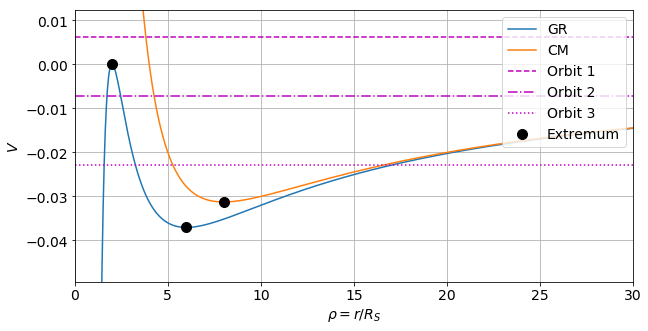

In [4]:
N = 1000
rho = np.linspace(1, 30, N)
l = 2

# Evaluate potentials
VGR = Veff(rho, l)
VCM = Vclassical(rho, l)

# Max/min
# Classical mechanics
rhoCM_min = 2*l**2
VCM_min = -0.125/l**2
# General relativity
rho_min = l**2 + l*(l**2 - 3)**.5
VGR_min = Veff(rho_min, l)
rho_max = l**2 - l*(l**2 - 3)**.5
VGR_max = Veff(rho_max, l)

plt.figure(figsize=(fig_size, fig_size/2))
# Potentials
plt.plot(rho, VGR, label="GR")
plt.plot(rho, VCM, label="CM")
# Three different types of orbits
edge = VGR_max - VGR_min
plt.plot([0, rho[-1]], 2*[VGR_max + edge/6], "--m", label="Orbit 1")
plt.plot([0, rho[-1]], 2*[(VGR_max + VGR[-1])/2], "-.m", label="Orbit 2")
plt.plot([0, rho[-1]], 2*[(VCM_min + VGR[-1])/2], ":m", label="Orbit 3")
# Extremum
plt.plot(rhoCM_min, VCM_min, 'ko', label="Extremum")
plt.plot(rho_min, VGR_min, 'ko')
plt.plot(rho_max, VGR_max, 'ko')
# Axes settings
plt.ylabel(r"$V$")
plt.xlabel(r"$\rho=r/R_S$")
plt.ylim([VGR_min - edge/3, VGR_max + edge/3])
plt.xlim([0, rho[-1]])
plt.legend(loc=1)
plt.show()

In classical mechanics, there exists only two different types of orbits:
- bound orbits: ellipses and circles (orbit 2 and 3)
- scattering orbits: hyperbola (orbit 1)

There is only one circular orbit in classical mechanics, and it is stable.

In general relativity there are three types of orbits:
- radial plunging (orbit 1)
- scattering orbits (orbit 2)
- bound orbits: precessing ellipses (orbit 3)

Note that there are two circular orbits in general relativity: one unstable (the maximum) and one stable (the minimum). The bound orbits are either circles or precessing ellipses. In the case of the scattering orbits, especially near the maximum, the orbit can hurl around the black hole several times before going off to infinity. We will encounter the three different orbits as examples later in this notebook. 

For a more complete analytical analysis, we refer you to ref. [[1]](#rsc).

### Equations of Motion and Numerical Implementation

By using Newton's second law and the newly introduced variables, we can rewrite equation \eqref{eq:force} as

\begin{equation}
\frac{\mathrm{d}^2 \rho}{\mathrm{d}T^2} =-\frac{1}{2\rho^2}\left(1 + \frac{3l^2}{\rho^2}\right),
\label{eq:eqmotion}
\end{equation}

where we have redefined $l$ as $l/R_s$.

Classical orbits are located in a plane due to conservation of angular momentum. The same is true for orbits in the Schwarzschild geometry (see appendix). We can thus choose that the particle is moving in the $xy$-plane.

Let $\mathrm \rho \equiv (x, y)$, $u\equiv \partial x/\partial \tau$ and $v\equiv \partial y/\partial \tau$. We can write (in natural units) equation \eqref{eq:force} as the four coupled first order differential equations 

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}T}=u,\quad \frac{\mathrm{d}u}{\mathrm{d}T}=-\frac{x}{2\rho^3}\left(1 + \frac{3l^2}{\rho^2}\right),
\end{equation}

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}T}=v,\quad \frac{\mathrm{d}v}{\mathrm{d}T}=-\frac{y}{2\rho^3}\left(1 + \frac{3l^2}{\rho^2}\right).
\end{equation}

Note that $u$ and $v$ are given as a fraction of the speed of light, which implies that $|u|\leq 1$, $|v|\leq 1$.

We implement the fourth order Runge-Kutta method. If you are unfamiliar with this method, we refer you to one of our notebooks on the subject. In the code below, we define $A\equiv 1/2$ and $B\equiv 3l^2$

In [5]:
def getB(x, y, u, v):
    """ Computes the constant B. """
    l2 = (x*v - y*u)**2
    # Note that l2 has the "dimension" R_s 
    return 3*l2

def getA():
    """ Computes the constant A. """
    return .5

def RHS(Z, A, B):
    """ Returns the time derivatives of Z = X, Y, U and V. """
    
    rho = np.sqrt(Z[0]**2 + Z[1]**2)
    correction = 1 + B/rho**2
    dUdtau = -A*Z[0]/rho**3*correction
    dVdtau = -A*Z[1]/rho**3*correction
    
    return np.array([Z[2], Z[3], dUdtau, dVdtau])

def rk4step(f, y, h, A, B):
    """Calculate next step of an IVP of an ODE with a RHS described by the RHS function with RK4.
    Parameters:
        f: function. Right hand side of the ODE.
        y: float. Current step (position).
        h: float. Step-length.
    Returns:
        Next step.
    """
    
    s1 = f(y, A, B)
    s2 = f(y + h*s1/2.0, A, B)
    s3 = f(y + h*s2/2.0, A, B)
    s4 = f(y + h*s3, A, B)
    
    return y + h/6.0*(s1 + 2.0*s2 + 2.0*s3 + s4)

def getOrbit(n, T_max, Z0):
    """ Computes the orbit of the particle using the fourth order
    Runge-Kutta method.
    Parameters:
        n     : int. Number of iterations
        T_max : float. Stop time T=tau/t0
        Z0    : numpy-array, len(4), float.
                Position and velocities
                Z0 = [x, y, u, v]
    Returns:
        numpy-array, size(4, n). Z = [x[], y[], u[], v[]]
        Position and velocities for the orbit.
    """
    B = getB(*Z0)
    print("GR correction constant: %.2e"%(B))
    A = getA()
    
    h = T_max/float(n)
    Z = np.zeros((4, n + 1))
    Z[:, 0] = Z0

    tic = time.time()
    for i in range(0, n):
        Z[:, i + 1] = rk4step(RHS, Z[:, i], h, A, B)
    print("%.5f s, run time with %i steps."% (time.time() - tic, n))
    
    return Z

### Conserved Quantities

One method for checking the numerical accuracy of our numerical method is to check if the conserved quantities of the system in fact are conserved. In the appendix we show that the angular momentum per unit mass $l = |\mathbf v\times \mathbf r|$ and the energy per unit mass $\mathcal E$ defined in equation \eqref{eq:energy_ein} are constants.

## Examples

We are now ready to look at some examples. Before we start we create a plotting function so that we don't repeate ourselves. We will plot the orbit in the $xy$-plane, the effective potential and $\mathcal E$. Moreover, we will check that $\mathcal E$ and $l$ are conserved. We will denote the event horizon as a gray circle.

In [6]:
def plotOrbit(Z, lim_fact):
    """ Plots the orbit, energy and effective potential.
    Parameters:
        Z: numpy-array, size(4, n). Z = [x[], y[], u[], v[]]
           Position and velocities for the orbit.
        lim_fact: float. Axis limits are given lim_fact
           multiplied by the start position.
    """
    plt.figure(figsize=(2*fig_size, fig_size))

    rho = (Z[0, :]**2 + Z[1, :]**2)**.5
    l = Z[0, :]*Z[3, :] - Z[1, :]*Z[2, :]
    
    # Trajectory
    ax = plt.subplot(2, 2, (1, 3))
    plt.title("Orbit")
    ax.plot(Z[0, :], Z[1, :], label="Orbit")
    ax.plot(Z[0, 0], Z[1, 0], "o", label="Start")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    ax.plot(0, 0, ".", label="Origin")
    circle = plt.Circle((0, 0), radius=1, color="gray")
    ax.add_artist(circle)
    ax_lim = max(Z[0, 0], Z[1, 0])
    plt.xlim([-lim_fact*ax_lim, lim_fact*ax_lim])
    plt.ylim([-lim_fact*ax_lim, lim_fact*ax_lim])
    plt.legend()
    
    # Effective potential
    plt.subplot(2, 2, 2)
    plt.title("Effective potential")
    r = np.linspace(1.5, 20, 500)
    plt.plot(r, Veff(r, l[0]), label="Effective pot.")
    e = Veff(rho[0], l) + K(Z[:, 0:2])[0]
    plt.plot([r[0], r[-1]], [e, e], label="Energy density")
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$V$")
    
    # Energy per unit rest mass
    plt.subplot(2, 2, 4)
    plt.title("Kinetic and potential energy")
    V = Veff(rho, l)
    Ek = K(Z)
    E = V + Ek
    plt.plot(V)
    plt.plot(Ek, label=r"$\frac{1}{2}\left(\frac{dr}{d\tau}\right)^2$")
    plt.plot(E, label=r"$E$")
    plt.xlabel("Step")
    plt.ylabel("Energy density")
    plt.legend()
    print("Relative change in\n E: %.2e\n l: %.2e"%((E[0] - E[-1])/E[0], (l[0] - l[-1])/l[-1]))
    
    plt.show()

### Radial plunging

GR correction constant: 1.02e+01
0.24435 s, run time with 5000 steps.
Relative change in
 E: 1.21e-03
 l: 3.95e-08


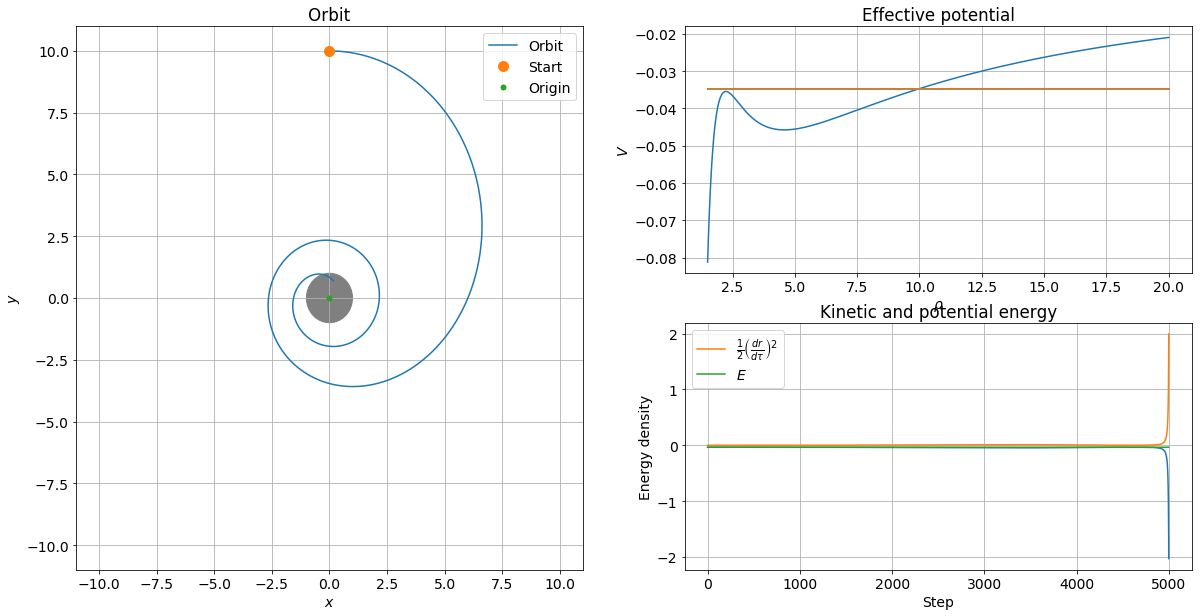

In [7]:
Z0 = [0, 10, .1845, 0]
#Z0 = [0, 10, .1849, 0]
n = 5000
tau_max = 102.7
Z = getOrbit(n, tau_max, Z0)
plotOrbit(Z, 1.1)

### Precessing orbits

GR correction constant: 1.20e+01
0.24000 s, run time with 5000 steps.
Relative change in
 E: -1.01e-04
 l: 1.52e-05


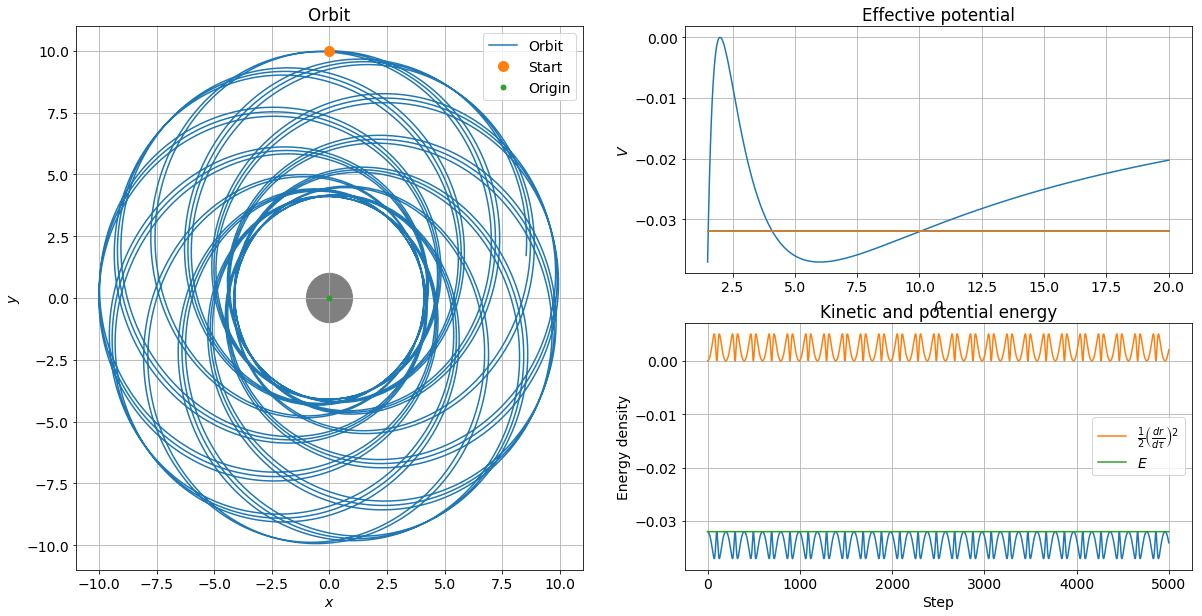

In [8]:
#Z0 = [0, 20, .1, 0]
#Z0 = [0, 10, 0.2, -0.2]
#Z0 = [0, 10, .25, 0]
#Z0 = [0, 10, 0.2, -.1]
Z0 = [0, 10, .2, 0]
n = 5000
tau_max = 5000
Z = getOrbit(n, tau_max, Z0)
plotOrbit(Z, 1.1)

### Scattering orbits

GR correction constant: 1.20e+01
0.25200 s, run time with 5000 steps.
Relative change in
 E: -3.27e-04
 l: 3.04e-07


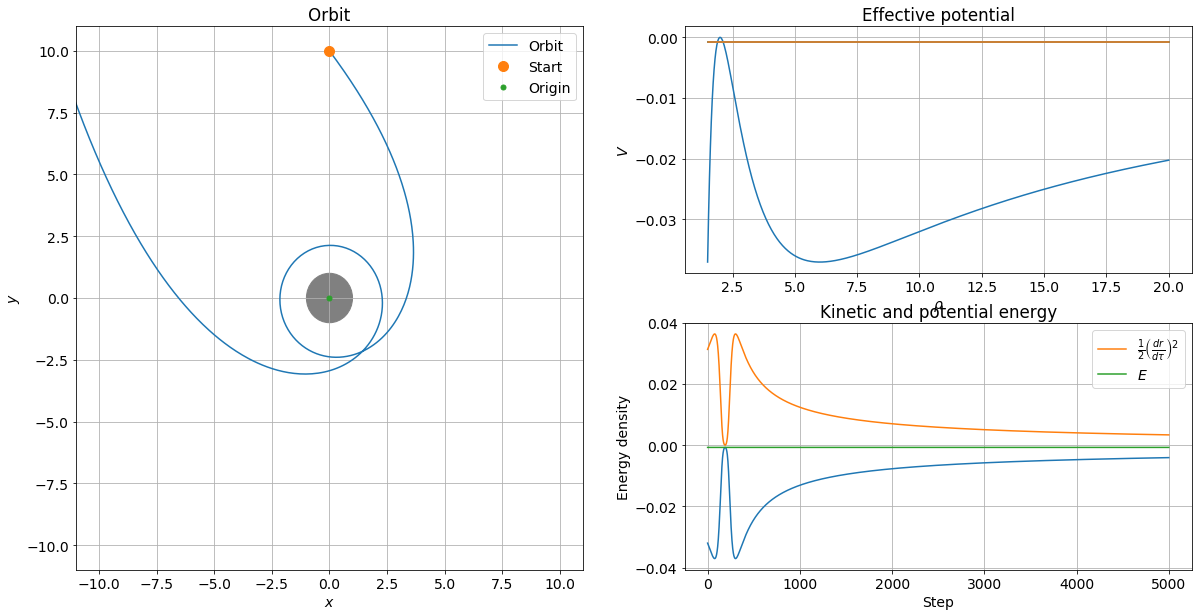

In [9]:
#Z0 = [0, 100, 0.05, -0.5]
Z0 = [0, 10, 0.2, -.25]

n = 5000
tau_max = 1000
Z = getOrbit(n, tau_max, Z0)
plotOrbit(Z, 1.1)

### Exercises

It is now your time to play around with the codes and concepts introduced in this notebook. We leave you with a couple of exercises you can consider:

1. What happens once inside the Schwarzschild radius? 
2. Try to start the orbit inside the Schwarzschild radius. Can you escape?
3. When the particle reaches $r=0$ it flies off to infinity. Why?
4. What is the period of the precessing orbit in the example above in SI-units?
5. What would an observer at $r=\infty$ observe when a spacecraft approaches the event horizon? How can this paradox be resolved? (see ref. [1])

<a id="rsc"></a>
## Resources
- [1]: Hartle, J. B. (2003), Gravity: An Introduction to Einstein's General Relativity , Benjamin Cummings .

<a id="apnd"></a>
## Appendix

In this appendix we will derive the expressions used to describe the motion of Mercury around the Sun. The same expressions holds for any (point) mass around a spherically symmetric mass distribution. It is assumed that the reader has some knowledge about Special Theory of Relativity and Einstein's summation convention. 
We will be using the metric convention $(-+++)$ and natural units $c=G=1 (=\hbar=k_B)$.

#### A confusingly short review of special relativity
Let us start by recalling a few concepts from special relativity. Consider the standard textbook setup in which a inertial system $S'$ is moving along the $x$-axis with constant velocity $v$ with respect to an inertial system $S$. The Lorentz' transformations are in this case given by

$$\Delta t' = \gamma (\Delta t - v\Delta x),\quad \Delta x' = \gamma (\Delta x - v\Delta t),\quad \Delta y' = \Delta y,\quad \Delta z' = \Delta z,$$

where $\gamma = 1/\sqrt{1-v^2}$ as usual. The inverse transformations are

$$\Delta t = \gamma (\Delta t' + v\Delta x'),\quad \Delta x = \gamma (\Delta x' + v\Delta t'),\quad \Delta y = \Delta y',\quad \Delta z = \Delta z'.$$

From this we can derive expressions for consepts like *time dilation*, *length contraction* and *simultaneity*.

The *position four-vector* $x^\alpha$ is defined as the four-tuple with elements $x^0 = t$, $x^1 = x$, $x^2 = y$ and $x^3 = z$. More generally, we define a four-vector $a^\alpha$ as a four-tuple which Lorentz transforms in the same way as $x^\alpha$. Note in particular that the quantity $x_\alpha x^\alpha \equiv \eta_{\alpha\beta}x^{\alpha}x^{\beta}$ is Lorentz invariant. $\eta_{\alpha\beta} = \mathrm{diag}(-1, 1, 1, 1)$ is the Minkowsky metric tensor, that is, the metric tensor of flat space-time. This is the case for all four-vectors. Is is easy to show that for the Minkowsky (flat space) metric, we have

$$\mathrm{d} s^2 = \eta_{\alpha\beta}\mathrm{d}x^\alpha\mathrm{d}x^\beta=-\mathrm{d}t^2 + \mathrm{d}x^2+ \mathrm{d}y^2+ \mathrm{d}z^2= -1.$$

This is even the case in General Theory of Relativity for a general metric $g_{\alpha\beta}$.

Consider a particle moving along the $x$-axis with a velocity $v$. Let $t'\equiv \tau$ be the *proper time* of the particle. The *four-velocity* is given by

$$u^\alpha\equiv\frac{\mathrm{d}x^\alpha}{\mathrm{d}\tau} = \left(\frac{\mathrm{d} t}{\mathrm{d} \tau}, \frac{\mathrm{d} \vec x}{\mathrm{d} \tau}\right) = \gamma\left(1, \frac{\mathrm{d} \vec x}{\mathrm{d} t}\right).$$

In our natural units, we see that $-\mathrm{d}\tau^2 = \mathrm{d}s^2$. This implies that
$$u^\alpha u_\alpha = \frac{\mathrm{d} x^\alpha}{\mathrm{d}\tau}\frac{\mathrm{d} x_\alpha}{\mathrm{d}\tau} = \frac{\mathrm{d}s^2}{\mathrm{d}\tau^2} = -1.$$
Again, this holds even for curved space-time.

#### The Schwarzschild metric
Our starting point for the derivation of the equations is the *Schwarzschild metric*

\begin{equation}
    \mathrm{d} s^2 = -\left(1-\frac{2GM}{c^2r}\right)(c\mathrm{d} t)^2 + \left(1-\frac{2GM}{c^2 r}\right)^{-1} \mathrm{d}r^2 + r^2\left(\mathrm{d}\theta + \sin^2\theta\mathrm{d}\phi^2\right).
\end{equation}

This metric describes the curvature of space-time around a spherically symmetric mass distribution. More more information or deeper insight, we refer you to e.g. [[1]](#rsc). We will for simplicity use natural units, in which $c=G=1 (=\hbar=k_B)$. The metric can in this case be written as

\begin{equation}
g_{\alpha\beta} = \mathrm{diag}\left(-(1-2M/r), (1-2M/r)^{-1}, r^2, r^2\sin^2\theta\right).
\end{equation}

We make the following observations (see [[1]](#rsc) for more):
1. The metric is time-independent. There is thus a *Killing vector* $\xi^\alpha = (1, 0, 0, 0)$ associated with the symmetry of displacement in time $t$.
2. The metric is spherically symmetric. The surface of constant $t$ and $r$ is given by the line element $\mathrm{d}\Sigma^2 = r^2\left(\mathrm{d}\theta^2 + \sin^2\theta\; \mathrm{d}\phi^2\right)$.
3. The metric is independent of $\phi$. There is thus a *Killing vector* $\eta^\alpha = (0,0,0,1)$ corresponding to the rotational symmetry around the $z$-axis. There are additional, less intuitive Killing vectors for the metric, but we will not be needing them here.
4. There is a coordinate singularity at $r=2M$ and a physical singularity at $r=0$. This is called the *Schwarzschild radius*. If all the mass is located within $r=2M$, we obtain a *Black Hole*, and $r=2M$ is called the *Event Horizon*. We will not discuss Black Holes any further here.
5. The geometry is asymptotically flat. That is, we recover Minkowski space (flat space-time, $g_{\alpha\beta}=\mathrm{diag}(-1, 1, 1, 1)$) for $r \gg 2G$.
6. $M$ is interpreted as the *total mass of the source of the curvature* (this can be seen by expanding the metric for small $GM/r$. The result is the *static weak field metric* with Newtonian gravitational potential $\Phi = -GM/r$.)

#### Derivation of the expressions

From observation 1 and 2, it follows that the quantities $\xi^\alpha u_\alpha$ and $\eta^\alpha u_\alpha$ (remember that we use the Einstein summation convention) are conserved, where $u^\alpha$ is the four-velocity of the particle. More specifically, they are constants along the geodesic. Define

$$e \equiv -\xi^\alpha u_\alpha = g_{\alpha\beta}\xi^\alpha u^\beta = \left(1-\frac{2M}{r}\right)\frac{\mathrm{d}t}{\mathrm{d}{\tau}}$$

and

$$l\equiv \eta^\alpha u_\alpha = g_{\alpha\beta}\eta^\alpha u^\beta = r^2\sin^2\theta\frac{\mathrm{d}\phi}{\mathrm{d}{\tau}}.$$

$e$ is often called the *energy per unit rest mass*, since this is what the energy reduces to in flat space ($E=mu^t = m(\mathrm d t/\mathrm d \tau)$). In the same manner, $l$ is called *angular momentum per unit rest mass* because this is what it reduces to at low velocities. As in classical mechanics, the angular momentum and energy (per unit rest mass) is conserved.

The conservation of angular momentum implies that the orbit lies in a given plane. We thus choose $\theta=\pi/2$ and  $\mathrm{d}\theta = 0$ without loss of generality. In this case

$$ -1=g_{\alpha\beta}u^\alpha u^\beta=-\left(1-\frac{2M}{r}\right) \left(u^t\right)^2 + \left(1-\frac{2M}{r}\right)^{-1} \left(u^r\right)^2 + r^2 \left(u^\phi\right)^2.$$

By writing $u^\alpha = \mathrm d x^\alpha/\mathrm d \tau$ and using the expressions for the constants $e$ and $l$, we can rewrite this as

\begin{equation}
\mathcal{E} = \frac{1}{2}\left(\frac{\mathrm{d} r}{\mathrm{d} \tau}\right)^2 + V_{\mathrm{eff}}(r),
\label{eq:energy_ein}
\end{equation}

where we have defined the constant

$$\mathcal E \equiv \frac{e^2 - 1}{2},$$

and the effective potential

$$V_\mathrm{eff}(r)\equiv -\frac{M}{r}+\frac{l^2}{2r^2}- \frac{Ml^2}{r^3}.$$

Equation \eqref{eq:energy_ein} can be viewed as a statement that the total energy of the system is equal to the sum of the kinetic and potential energy. If we reinstate $c$ and $G$ and multiply by the mass of the object, $m$, on both sides of equation \eqref{eq:energy_ein}, we obtain

\begin{equation}
E = \frac{1}{2}mu^2 + \frac{L^2}{2mr^2} - \frac{GMm}{r} - \frac{GML^2}{c^2mr^3},
\label{eq:orben}
\end{equation}

where $u = (\mathrm d r/\mathrm d\tau)^2$ is the relativistic velocity, $E=\mathcal E m$ is the total energy and $L^2 = l^2m^2$ is the orbital angular momentum. In the classical limit ($c\to \infty$, $\mathrm d \tau\to\mathrm d t$) to the well known classical expression for the orbital energy

\begin{equation}
E_\mathrm{classical} = \frac{1}{2}mv^2 + \frac{L^2}{2mr^2} - \frac{GMm}{r}.
\end{equation}

In other words, the last term in equation \eqref{eq:orben} is a general relativistic correction to the classical expression. Note also that we are working with the proper time in equation \eqref{eq:orben}.

We obtain the radial force by differentiating the last two terms in equation \eqref{eq:orben}. The result is

\begin{equation}
F = -\frac{\partial }{\partial r}\left(-\frac{GMm}{r} - \frac{GML^2}{c^2mr^3}\right)=-\frac{GMm}{r^2}\left(1 + \frac{3l^2}{c^2r^2}\right).
\end{equation}